In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
dtypes = {'DateTime': str,
           '06299_TI1302.PV': float,
              '06299_MI1302.PV': float,
                '06299_TI1402.PV': float,
                    '06299_MI1402.PV': float,
                        '07633_TI0601.PV': float,
                            '07633_HI0101.PV': float,
                                '07781_TI1501.PV': float,
                                    '07781_MI1501.PV': float}


th = pd.read_excel('../../data/raw/Temperaturas y humedades.xlsx', sheet_name='Datos', dtype=dtypes)
th

,DateTime,06299_TI1302.PV,06299_MI1302.PV,06299_TI1402.PV,06299_MI1402.PV,07633_TI0601.PV,07633_HI0101.PV,07781_TI1501.PV,07781_MI1501.PV
0,2023-03-15 00:00:00.000,23.931585,34.801435,22.854169,35.223422,18.901909,35.290073,20.247395,48.842590
1,2023-03-15 01:00:00.000,23.747978,34.404315,21.562853,36.619001,18.786171,35.456451,20.247395,48.712383
2,2023-03-15 02:00:00.000,23.615734,33.789356,22.580972,33.759999,18.453837,35.040508,20.133463,48.571323
3,2023-03-15 03:00:00.000,19.906570,38.749275,19.631797,38.061402,18.422140,33.698639,20.133463,48.296440
4,2023-03-15 04:00:00.000,19.037770,39.895817,19.551820,37.560487,18.726911,32.628036,19.997829,48.166233
...,...,...,...,...,...,...,...,...,...
13099,2024-09-10 20:00:00.000,18.594929,71.293758,18.877224,64.958649,20.865883,46.839989,21.306482,45.888538
13100,2024-09-10 21:00:00.000,18.399609,72.166002,18.865017,65.335573,20.486107,46.724247,21.169041,43.729252
13101,2024-09-10 22:00:00.000,18.289743,71.672722,18.692587,68.999299,20.105803,46.185329,20.626505,43.327778
13102,2024-09-10 23:00:00.000,18.399609,71.721550,18.828394,73.986536,19.997826,46.062355,20.357046,44.282639


In [25]:
# Are datetime values loaded correctly?
# Any null on the datetime column?
print(th['DateTime'].isnull().sum())
# Any non digit character on the datetime column?
# Regex for datetime values
print(th['DateTime'].str.contains(r'[^0-9\-\.\,\s:]').sum())
# Does any string not follow this regex?
print(th['DateTime'].str.contains(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{3}').sum())

0
0
13104


In [26]:
th['DateTime'] = pd.to_datetime(th['DateTime'])
th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DateTime         13104 non-null  datetime64[ns]
 1   06299_TI1302.PV  13101 non-null  float64       
 2   06299_MI1302.PV  13100 non-null  float64       
 3   06299_TI1402.PV  13101 non-null  float64       
 4   06299_MI1402.PV  13101 non-null  float64       
 5   07633_TI0601.PV  13103 non-null  float64       
 6   07633_HI0101.PV  13103 non-null  float64       
 7   07781_TI1501.PV  13099 non-null  float64       
 8   07781_MI1501.PV  13100 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 921.5 KB


In [27]:
# Are there any duplicated rows?
print(th.duplicated().sum())

0


In [28]:
# There are columns with null values, put them on a list
null_cols = th.columns[th.isnull().any()].tolist()
null_cols

['06299_TI1302.PV',
 '06299_MI1302.PV',
 '06299_TI1402.PV',
 '06299_MI1402.PV',
 '07633_TI0601.PV',
 '07633_HI0101.PV',
 '07781_TI1501.PV',
 '07781_MI1501.PV']

In [29]:
# Show me the rows with null values
th[th.isnull().any(axis=1)]

,DateTime,06299_TI1302.PV,06299_MI1302.PV,06299_TI1402.PV,06299_MI1402.PV,07633_TI0601.PV,07633_HI0101.PV,07781_TI1501.PV,07781_MI1501.PV
3356,2023-08-01 21:00:00,NaN,NaN,NaN,NaN,21.654366,53.693184,20.151185,51.388889
5674,2023-11-06 10:00:00,18.961966,46.348461,21.318705,38.315154,NaN,NaN,20.401186,41.536457
6016,2023-11-20 16:00:00,NaN,NaN,NaN,NaN,21.950951,39.771412,20.021412,49.377892
6900,2023-12-27 12:00:00,21.855831,38.023010,18.558306,25.224400,23.629196,27.535446,NaN,NaN
6901,2023-12-27 13:00:00,22.856838,37.096119,20.260811,20.074763,23.422116,26.996529,NaN,NaN
6902,2023-12-27 14:00:00,23.455000,35.798210,20.964689,18.704794,22.229825,27.401619,NaN,NaN
9416,2024-04-10 09:00:00,18.795450,41.434066,19.289405,38.580476,20.500580,40.304253,NaN,NaN
10310,2024-05-17 15:00:00,NaN,NaN,NaN,NaN,22.575429,43.729357,20.164280,51.241606
11850,2024-07-20 19:00:00,20.085756,NaN,19.817194,67.473373,23.759399,47.237846,NaN,51.570686


In [30]:
# Min and max values for each column
th.describe()

,DateTime,06299_TI1302.PV,06299_MI1302.PV,06299_TI1402.PV,06299_MI1402.PV,07633_TI0601.PV,07633_HI0101.PV,07781_TI1501.PV,07781_MI1501.PV
count,13104,13101.000000,13100.000000,13101.000000,13101.000000,13103.000000,13103.000000,13099.000000,13100.000000
mean,2023-12-13 00:11:51.538461696,19.945667,59.758269,21.225364,52.883192,21.153857,44.195312,20.309929,47.745456
min,2023-03-15 00:00:00,11.207923,17.899105,14.017152,16.216573,17.462379,20.525896,19.399305,25.625723
25%,2023-07-29 12:45:00,18.338572,46.750788,19.103062,40.836264,20.225693,40.960716,20.083971,45.382350
50%,2023-12-12 23:30:00,19.634083,61.750085,20.537432,53.287868,21.137154,44.865162,20.288324,49.348072
75%,2024-04-27 12:15:00,21.669557,71.920933,22.182369,66.390607,22.037758,48.216869,20.426504,51.388938
max,2024-09-11 00:00:00,39.573353,93.908478,38.340405,86.951979,26.645691,60.445585,26.199074,59.357064
std,NaN,4.208069,15.538909,3.348947,14.166843,1.252494,6.070702,0.487869,4.930274


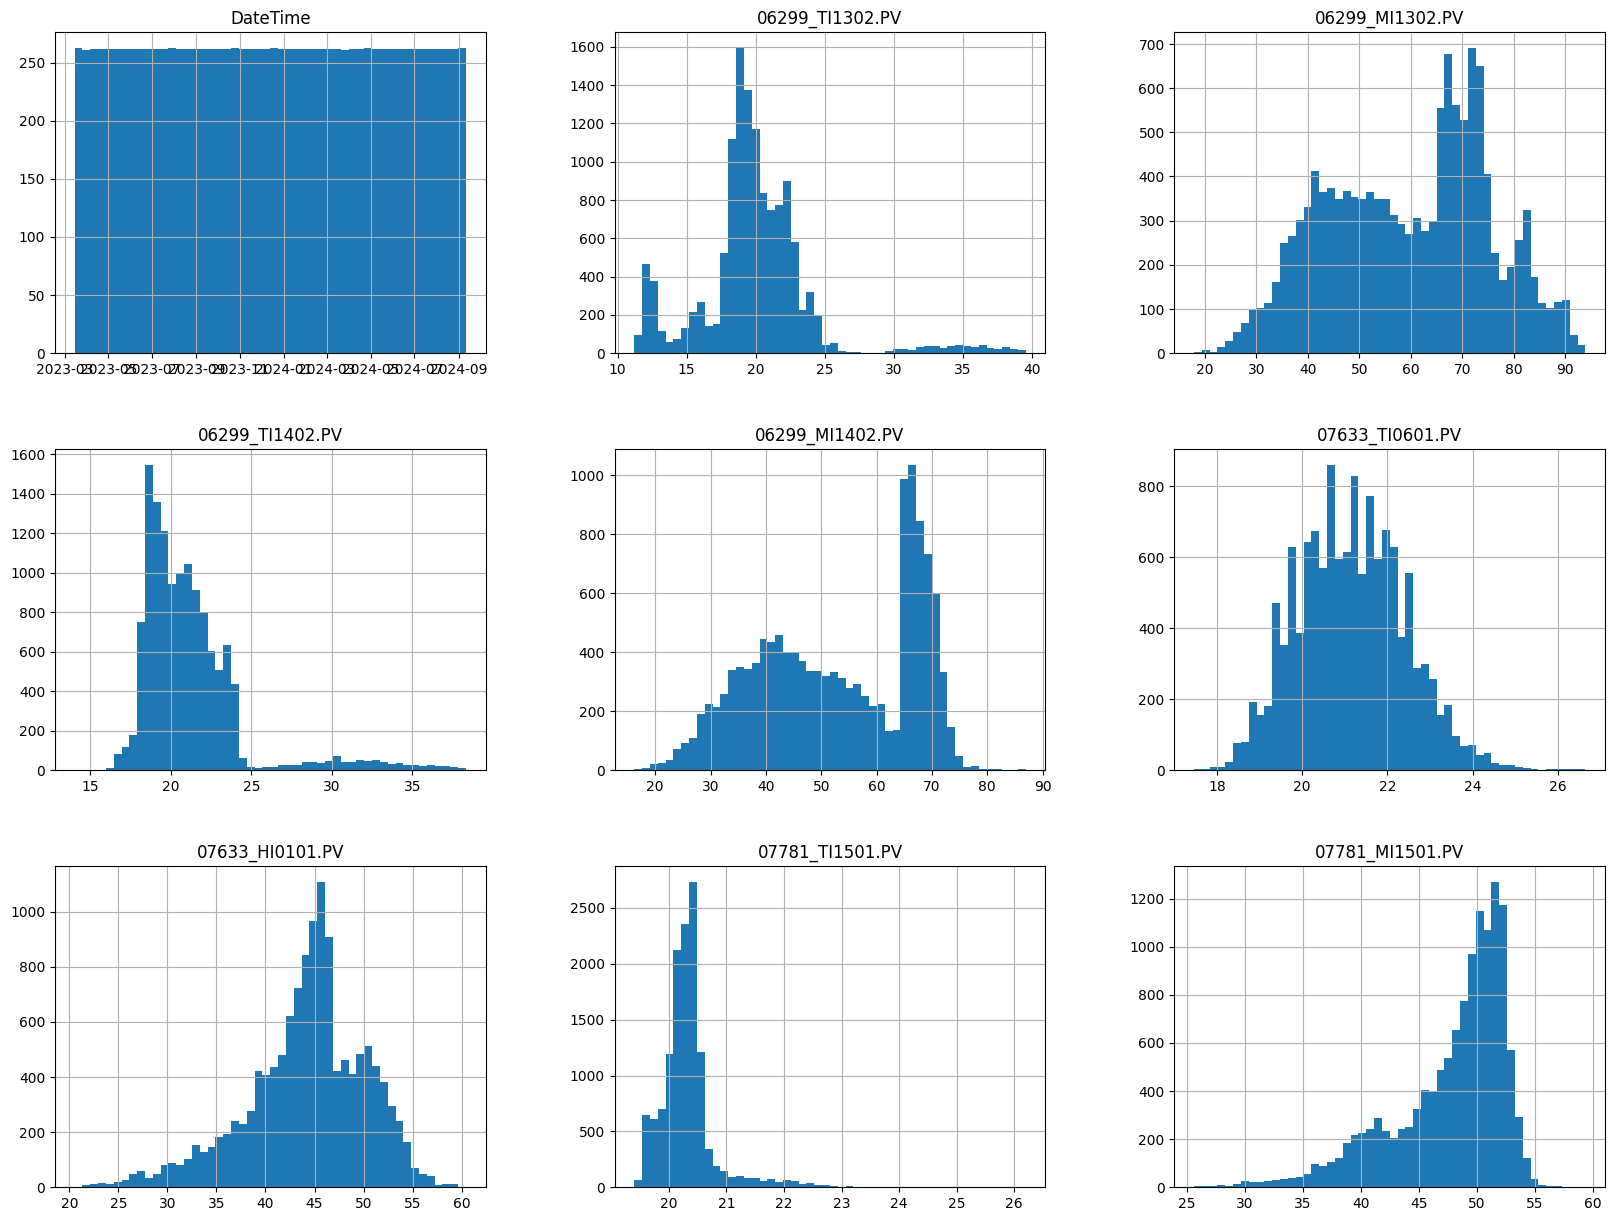

In [31]:
# Plot hist of each column
th.hist(bins=50, figsize=(20,15))
plt.show()


In [32]:
# Save the cleaned data
th.to_csv('../../data/processed/th.csv', index=False)